In [1]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = datasets.load_iris(return_X_y=True)

In [3]:
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing

In [4]:
pca = decomposition.PCA()
pca.fit(X)

PCA()

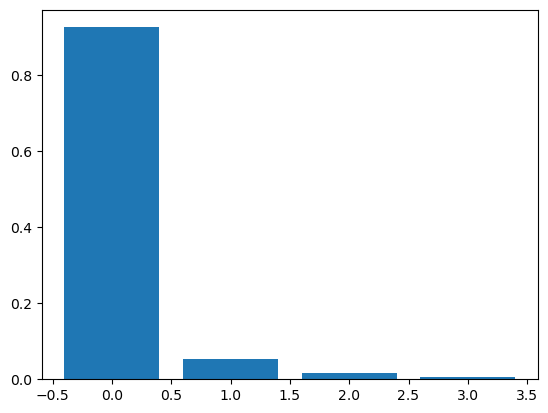

In [5]:
plt.bar(range(4), pca.explained_variance_ratio_)
plt.show()

In [6]:
U = pca.transform(X)
U = U[:,:2]

In [7]:
U2 = U[Y != 0]
Y2 = Y[Y != 0]

In [8]:
np.putmask(Y2, Y2 == 1, -1)
np.putmask(Y2, Y2 == 2, +1)

In [9]:
U2 = preprocessing.scale(U2)

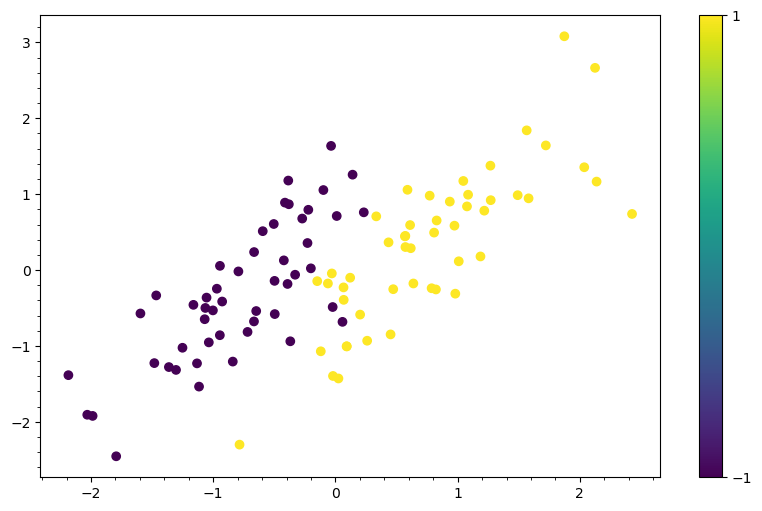

In [10]:
plt.figure(figsize=(10,6))
sc = plt.scatter(U2[:,0], U2[:,1], c=Y2)
plt.colorbar(sc,ticks=[-1,+1])
plt.minorticks_on()
plt.show()

In [11]:
import mltools.funcs as funcs
import mltools.lossfuncs as lossfuncs
import mltools.models as models
import mltools.gda as gda
import mltools.risks as risks

In [12]:
hinge_func = funcs.Hinge()
loss_func = lossfuncs.MarginLoss(hinge_func)
nnmod = models.SimpleNN(funcs.Sigmoidal(5.0), 2, 100)
risk = risks.Risk(nnmod, loss_func)

nnmod.param[:] = np.random.random(nnmod.n_param)

In [13]:
gd = gda.GradientDescent(risk, h=0.01)

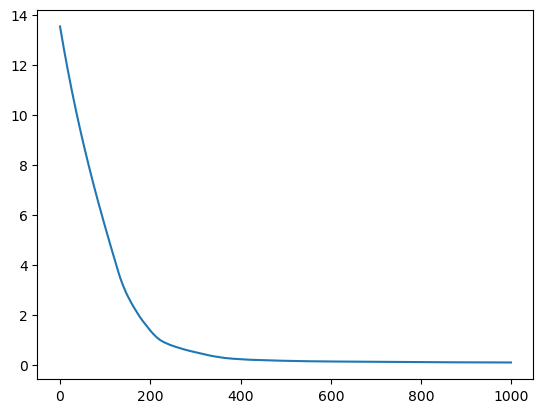

In [14]:
gd.fit(U2, Y2)
plt.plot(gd.rvals)
plt.show()

In [15]:
def calc_zz(mod, min_val, max_val):
    xrange = np.linspace(min_val, max_val, 100)
    yrange = np.linspace(min_val, max_val, 100)
    XX, YY = np.meshgrid(xrange, yrange)
    XY = np.c_[XX.ravel(), YY.ravel()]
    ZZ = mod.evaluate_all(XY)
    ZZ = ZZ.reshape(XX.shape)
    return ZZ

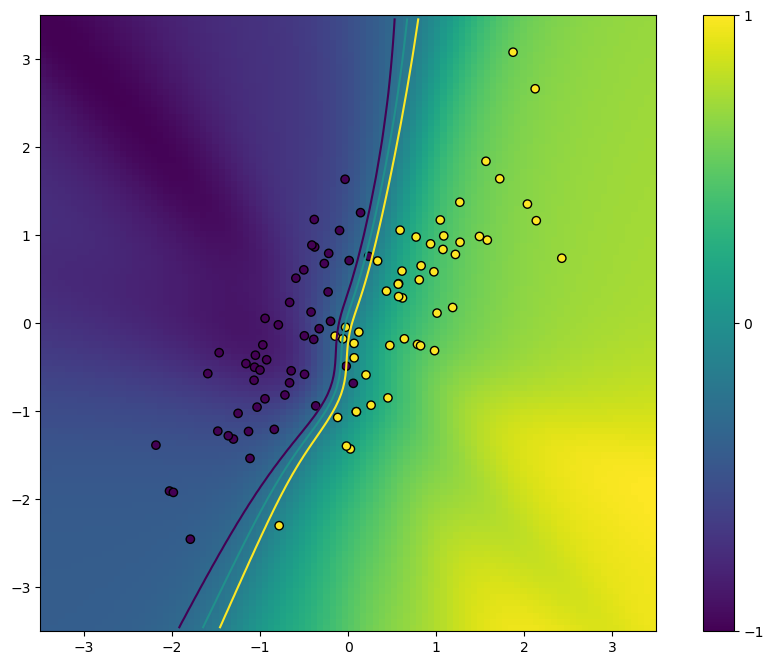

In [16]:
ZZ = calc_zz(nnmod, -3.5, 3.5)
plt.figure(figsize=(12,8))
cs = plt.scatter(U2[:,0], U2[:,1], c=Y2, edgecolors='k')
plt.imshow(ZZ, origin='lower', extent=(-3.5, 3.5,-3.5, 3.5))
plt.colorbar(cs, ticks=[-1,0,1])
plt.contour(ZZ, levels=[-0.5,0.,0.5], origin='lower', extent=(-3.5, 3.5,-3.5, 3.5))
plt.show()

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(Y2, np.sign(nnmod.evaluate_all(U2)))

0.96